In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

from pathlib import Path

DATA_PATH = Path("openscreen.csv")
assert DATA_PATH.exists(), f"Couldn't find {DATA_PATH.resolve()}"

# 1) Get column names from the header only (fast)
header_df = pd.read_csv(DATA_PATH, nrows=0)
cols = header_df.columns.str.strip().tolist()
n_cols = len(cols)

# 2) Count rows in chunks (robust and low-memory)
row_count = 0
for chunk in pd.read_csv(DATA_PATH, chunksize=100_000):
    row_count += len(chunk)

# 3) Print summary + column names
print(f"Rows: {row_count}")
print(f"Columns: {n_cols}\n")

print("Variable names:")
for c in cols:
    print(c)

Rows: 42847
Columns: 2993

Variable names:
Metadata_Well
Metadata_Object_Count
Nuc_AreaShape_Area
Nuc_AreaShape_BoundingBoxArea
Nuc_AreaShape_BoundingBoxMaximum_X
Nuc_AreaShape_BoundingBoxMaximum_Y
Nuc_AreaShape_BoundingBoxMinimum_X
Nuc_AreaShape_BoundingBoxMinimum_Y
Nuc_AreaShape_Center_X
Nuc_AreaShape_Center_Y
Nuc_AreaShape_Compactness
Nuc_AreaShape_Eccentricity
Nuc_AreaShape_EquivalentDiameter
Nuc_AreaShape_EulerNumber
Nuc_AreaShape_Extent
Nuc_AreaShape_FormFactor
Nuc_AreaShape_MajorAxisLength
Nuc_AreaShape_MaxFeretDiameter
Nuc_AreaShape_MaximumRadius
Nuc_AreaShape_MeanRadius
Nuc_AreaShape_MedianRadius
Nuc_AreaShape_MinFeretDiameter
Nuc_AreaShape_MinorAxisLength
Nuc_AreaShape_Orientation
Nuc_AreaShape_Perimeter
Nuc_AreaShape_Solidity
Nuc_AreaShape_Zernike_0_0
Nuc_AreaShape_Zernike_1_1
Nuc_AreaShape_Zernike_2_0
Nuc_AreaShape_Zernike_2_2
Nuc_AreaShape_Zernike_3_1
Nuc_AreaShape_Zernike_3_3
Nuc_AreaShape_Zernike_4_0
Nuc_AreaShape_Zernike_4_2
Nuc_AreaShape_Zernike_4_4
Nuc_AreaShape_Zerni

In [2]:
cols = [
    "Metadata_Well",
    "Metadata_Object_Count",
    "Metadata_Celltype",
    "Metadata_Site",
    "Metadata_Replicate",
    "Metadata_Plate_num",
    "Metadata_Unique_plate",
    "Metadata_EOS",
    "Metadata_Concentration",
    "Metadata_Partner",
    "Metadata_Row",
    "Metadata_Col",
    "Metadata_Compound_type",
    "Metadata_DMSO",
    "Metadata_Nocodazole",
    "Metadata_Tetrandrine",
]

df_small = pd.read_csv("openscreen.csv", usecols=cols, low_memory=False)
print(f"Subset shape: {df_small.shape[0]} rows x {df_small.shape[1]} columns")
df_small.head()

Subset shape: 42847 rows x 16 columns


,Metadata_Well,Metadata_Object_Count,Metadata_Celltype,Metadata_Site,Metadata_Replicate,Metadata_Plate_num,Metadata_Unique_plate,Metadata_EOS,Metadata_Concentration,Metadata_Partner,Metadata_Row,Metadata_Col,Metadata_Compound_type,Metadata_DMSO,Metadata_Nocodazole,Metadata_Tetrandrine
0,A01,700,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,EOS100001,10,Bioactives,A,1,EOS,False,False,False
1,A02,890,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,EOS100089,10,Bioactives,A,2,EOS,False,False,False
2,A03,742,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,EOS100009,10,Bioactives,A,3,EOS,False,False,False
3,A04,840,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,EOS100097,10,Bioactives,A,4,EOS,False,False,False
4,A05,91,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,EOS100017,10,Bioactives,A,5,EOS,False,False,False


In [3]:
cols = ["Metadata_Plate_num", "Metadata_Site", "Metadata_Replicate"]

def uniq_info(s: pd.Series):
    vals = s.dropna().unique()
    # Sort; fall back to string sort if mixed types
    try:
        vals_sorted = sorted(vals)
    except TypeError:
        vals_sorted = sorted(map(str, vals))
    return len(vals_sorted), vals_sorted

for c in cols:
    n, vals = uniq_info(df_small[c])
    print(f"{c} — distinct count: {n}")
    print("Values:", vals, "\n")

Metadata_Plate_num — distinct count: 7
Values: ['B1001', 'B1002', 'B1003', 'B1004', 'B1005', 'B1006', 'B1007'] 

Metadata_Site — distinct count: 4
Values: ['FMP', 'IMTM', 'MEDINA', 'USC'] 

Metadata_Replicate — distinct count: 4
Values: ['R1', 'R2', 'R3', 'R4'] 



In [4]:
letters = [chr(ord('A') + i) for i in range(16)]   # A .. P
numbers = list(range(1, 25))                       # 1 .. 24

table = (
    df_small
    .groupby(["Metadata_Row", "Metadata_Col"])
    .size()
    .unstack("Metadata_Col", fill_value=0)
    .reindex(index=letters, columns=numbers, fill_value=0)
    .astype(int)
)

# Print the table (wide). In notebooks, you can also just display(table).
print(table.to_string())

Metadata_Col   1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24
Metadata_Row                                                                                                                        
A             112  112  112  112  112  112  112  107  112  110  112  112  112  112  112  112  112  112  112  112  112  112  112  112
B             112  112  112  112  112  112  112  112  112  112  112  112  112  112  111  112  112  112  112  112  112  112  112  112
C             112  112  112  112  112  112  112  112  112  112  112  112  112  112  112  112  112  112  112  112  108  109  112  112
D             112  112  112  112  112  112  112  112  112  112  112  112  112  112  112  112  112  108  112  112  112  112  112  112
E             112  112  112  111  112  112  112  112  112  112  112  112  110  112  109  110  105  112  112  112  109  112  112  112
F             112  112  112  112  112  112  112  112  112  104  112  

In [5]:


def plot_well_heatmaps(df_small,
                       mode: str = "per_replicate",    # 'per_replicate' | 'collapsed' | 'combined_sites'
                       color_scale: str = "site",       # 'site' | 'global'
                       sites=("FMP","IMTM","MEDINA","USC"),
                       plates=tuple(f"B100{i}" for i in range(1,8)),
                       save: bool = False,
                       outdir: str = "plots"):
    assert mode in {"per_replicate","collapsed","combined_sites"}
    assert color_scale in {"site","global"}

    letters = [chr(ord("A")+i) for i in range(16)]  # A..P
    letter_to_idx = {L:i for i,L in enumerate(letters)}
    numbers = list(range(1,25))                     # 1..24
    replicates = ["R1","R2","R3","R4"]

    data = df_small.copy()
    data["Metadata_Row"] = data["Metadata_Row"].astype(str).str.upper()
    data["Metadata_Col"] = pd.to_numeric(data["Metadata_Col"], errors="coerce")
    data["Metadata_Object_Count"] = pd.to_numeric(data["Metadata_Object_Count"], errors="coerce")
    data = data[data["Metadata_Row"].isin(letters) & data["Metadata_Col"].between(1,24)]

    # Precompute global vmin/vmax if requested (before any collapsing)
    if color_scale == "global":
        vmin_glob = data["Metadata_Object_Count"].min()
        vmax_glob = data["Metadata_Object_Count"].max()
        if pd.isna(vmin_glob) or pd.isna(vmax_glob) or vmin_glob == vmax_glob:
            vmin_glob, vmax_glob = 0.0, 1.0

    # Colormap: green (low) -> red (high); NaN as blue
    cmap = plt.cm.RdYlGn_r.copy()
    cmap.set_bad("blue")

    def make_grid(sub_df: pd.DataFrame) -> np.ndarray:
        grid = np.full((16,24), np.nan, dtype=float)
        if not sub_df.empty:
            g = sub_df.groupby(["Metadata_Row","Metadata_Col"])["Metadata_Object_Count"].mean()
            for (r,c), v in g.items():
                grid[letter_to_idx[r], int(c)-1] = v
        return grid

    if save:
        Path(outdir).mkdir(parents=True, exist_ok=True)

    # --- Mode 1: per_replicate (unchanged) ---
    if mode == "per_replicate":
        for site in sites:
            site_df = data[(data["Metadata_Site"]==site) &
                           (data["Metadata_Plate_num"].isin(plates)) &
                           (data["Metadata_Replicate"].isin(replicates))]

            if color_scale == "site":
                vmin = site_df["Metadata_Object_Count"].min()
                vmax = site_df["Metadata_Object_Count"].max()
                if pd.isna(vmin) or pd.isna(vmax) or vmin == vmax: vmin, vmax = 0.0, 1.0
            else:
                vmin, vmax = vmin_glob, vmax_glob

            fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(22, 13), constrained_layout=True, sharex=True, sharey=True)
            fig.suptitle(f"{site} — Per replicate (green=low, red=high, blue=missing)", fontsize=14)

            for r_idx, rep in enumerate(replicates):
                for p_idx, plate in enumerate(plates):
                    ax = axes[r_idx, p_idx]
                    sub = site_df[(site_df["Metadata_Replicate"]==rep) & (site_df["Metadata_Plate_num"]==plate)]
                    ax.imshow(make_grid(sub), interpolation="nearest", cmap=cmap, norm=Normalize(vmin=vmin, vmax=vmax), aspect="auto")
                    ax.set_title(f"{rep} | {plate}", fontsize=9)
                    if p_idx == 0:
                        ax.set_yticks(range(16)); ax.set_yticklabels(letters, fontsize=7)
                    else:
                        ax.set_yticks([])
                    if r_idx == 3:
                        ax.set_xticks(range(24)); ax.set_xticklabels(numbers, fontsize=6, rotation=90)
                    else:
                        ax.set_xticks([])

            sm = ScalarMappable(norm=Normalize(vmin=vmin, vmax=vmax), cmap=cmap); sm.set_array([])
            fig.colorbar(sm, ax=axes.ravel().tolist(), shrink=0.75, pad=0.01).set_label("Metadata_Object_Count")
            fig.text(0.995, 0.02, "Blue = no data", ha="right", va="center", fontsize=9)
            if save: fig.savefig(Path(outdir)/f"{site}_per_replicate_4x7.png", dpi=200, bbox_inches="tight")
            plt.show()
        return

    # --- Mode 2: collapsed over replicates, per site (unchanged) ---
    if mode == "collapsed":
        collapsed = (data.groupby(["Metadata_Site","Metadata_Plate_num","Metadata_Row","Metadata_Col"], as_index=False)
                          ["Metadata_Object_Count"].mean())

        for site in sites:
            site_df = collapsed[(collapsed["Metadata_Site"]==site) & (collapsed["Metadata_Plate_num"].isin(plates))]

            if color_scale == "site":
                vmin = site_df["Metadata_Object_Count"].min()
                vmax = site_df["Metadata_Object_Count"].max()
                if pd.isna(vmin) or pd.isna(vmax) or vmin == vmax: vmin, vmax = 0.0, 1.0
            else:
                vmin, vmax = vmin_glob, vmax_glob

            fig, axes = plt.subplots(1, 7, figsize=(22, 4.5), constrained_layout=True, sharex=True, sharey=True)
            fig.suptitle(f"{site} — Average per well (replicates collapsed)", fontsize=14)

            for p_idx, plate in enumerate(plates):
                ax = axes[p_idx]
                sub = site_df[site_df["Metadata_Plate_num"]==plate]
                ax.imshow(make_grid(sub), interpolation="nearest", cmap=cmap, norm=Normalize(vmin=vmin, vmax=vmax), aspect="auto")
                ax.set_title(plate, fontsize=10)
                if p_idx == 0:
                    ax.set_yticks(range(16)); ax.set_yticklabels(letters, fontsize=7)
                else:
                    ax.set_yticks([])
                if p_idx == len(plates)-1:
                    ax.set_xticks(range(24)); ax.set_xticklabels(numbers, fontsize=6, rotation=90)
                else:
                    ax.set_xticks([])

            sm = ScalarMappable(norm=Normalize(vmin=vmin, vmax=vmax), cmap=cmap); sm.set_array([])
            fig.colorbar(sm, ax=axes.ravel().tolist(), shrink=0.8, pad=0.01).set_label("Average Metadata_Object_Count")
            fig.text(0.995, 0.02, "Blue = no data", ha="right", va="center", fontsize=9)
            if save: fig.savefig(Path(outdir)/f"{site}_collapsed_1x7.png", dpi=200, bbox_inches="tight")
            plt.show()
        return

    # --- Mode 3: combined_sites (NEW) -> average across ALL sites & replicates, 7 heatmaps total ---
    combined = (data.groupby(["Metadata_Plate_num","Metadata_Row","Metadata_Col"], as_index=False)
                     ["Metadata_Object_Count"].mean())

    # Color scaling: 'site' here means figure-specific (this single figure); 'global' uses precomputed global.
    if color_scale == "site":
        vmin = combined["Metadata_Object_Count"].min()
        vmax = combined["Metadata_Object_Count"].max()
        if pd.isna(vmin) or pd.isna(vmax) or vmin == vmax: vmin, vmax = 0.0, 1.0
    else:
        vmin, vmax = vmin_glob, vmax_glob

    fig, axes = plt.subplots(1, 7, figsize=(22, 4.5), constrained_layout=True, sharex=True, sharey=True)
    fig.suptitle("All sites combined — Average per well", fontsize=14)

    for p_idx, plate in enumerate(plates):
        ax = axes[p_idx]
        sub = combined[combined["Metadata_Plate_num"]==plate]
        ax.imshow(make_grid(sub), interpolation="nearest", cmap=cmap, norm=Normalize(vmin=vmin, vmax=vmax), aspect="auto")
        ax.set_title(plate, fontsize=10)
        if p_idx == 0:
            ax.set_yticks(range(16)); ax.set_yticklabels(letters, fontsize=7)
        else:
            ax.set_yticks([])
        if p_idx == len(plates)-1:
            ax.set_xticks(range(24)); ax.set_xticklabels(numbers, fontsize=6, rotation=90)
        else:
            ax.set_xticks([])

    sm = ScalarMappable(norm=Normalize(vmin=vmin, vmax=vmax), cmap=cmap); sm.set_array([])
    fig.colorbar(sm, ax=axes.ravel().tolist(), shrink=0.8, pad=0.01).set_label("Average Metadata_Object_Count (all sites)")
    fig.text(0.995, 0.02, "Blue = no data", ha="right", va="center", fontsize=9)
    if save: fig.savefig(Path(outdir)/"ALLSITES_combined_1x7.png", dpi=200, bbox_inches="tight")
    plt.show()


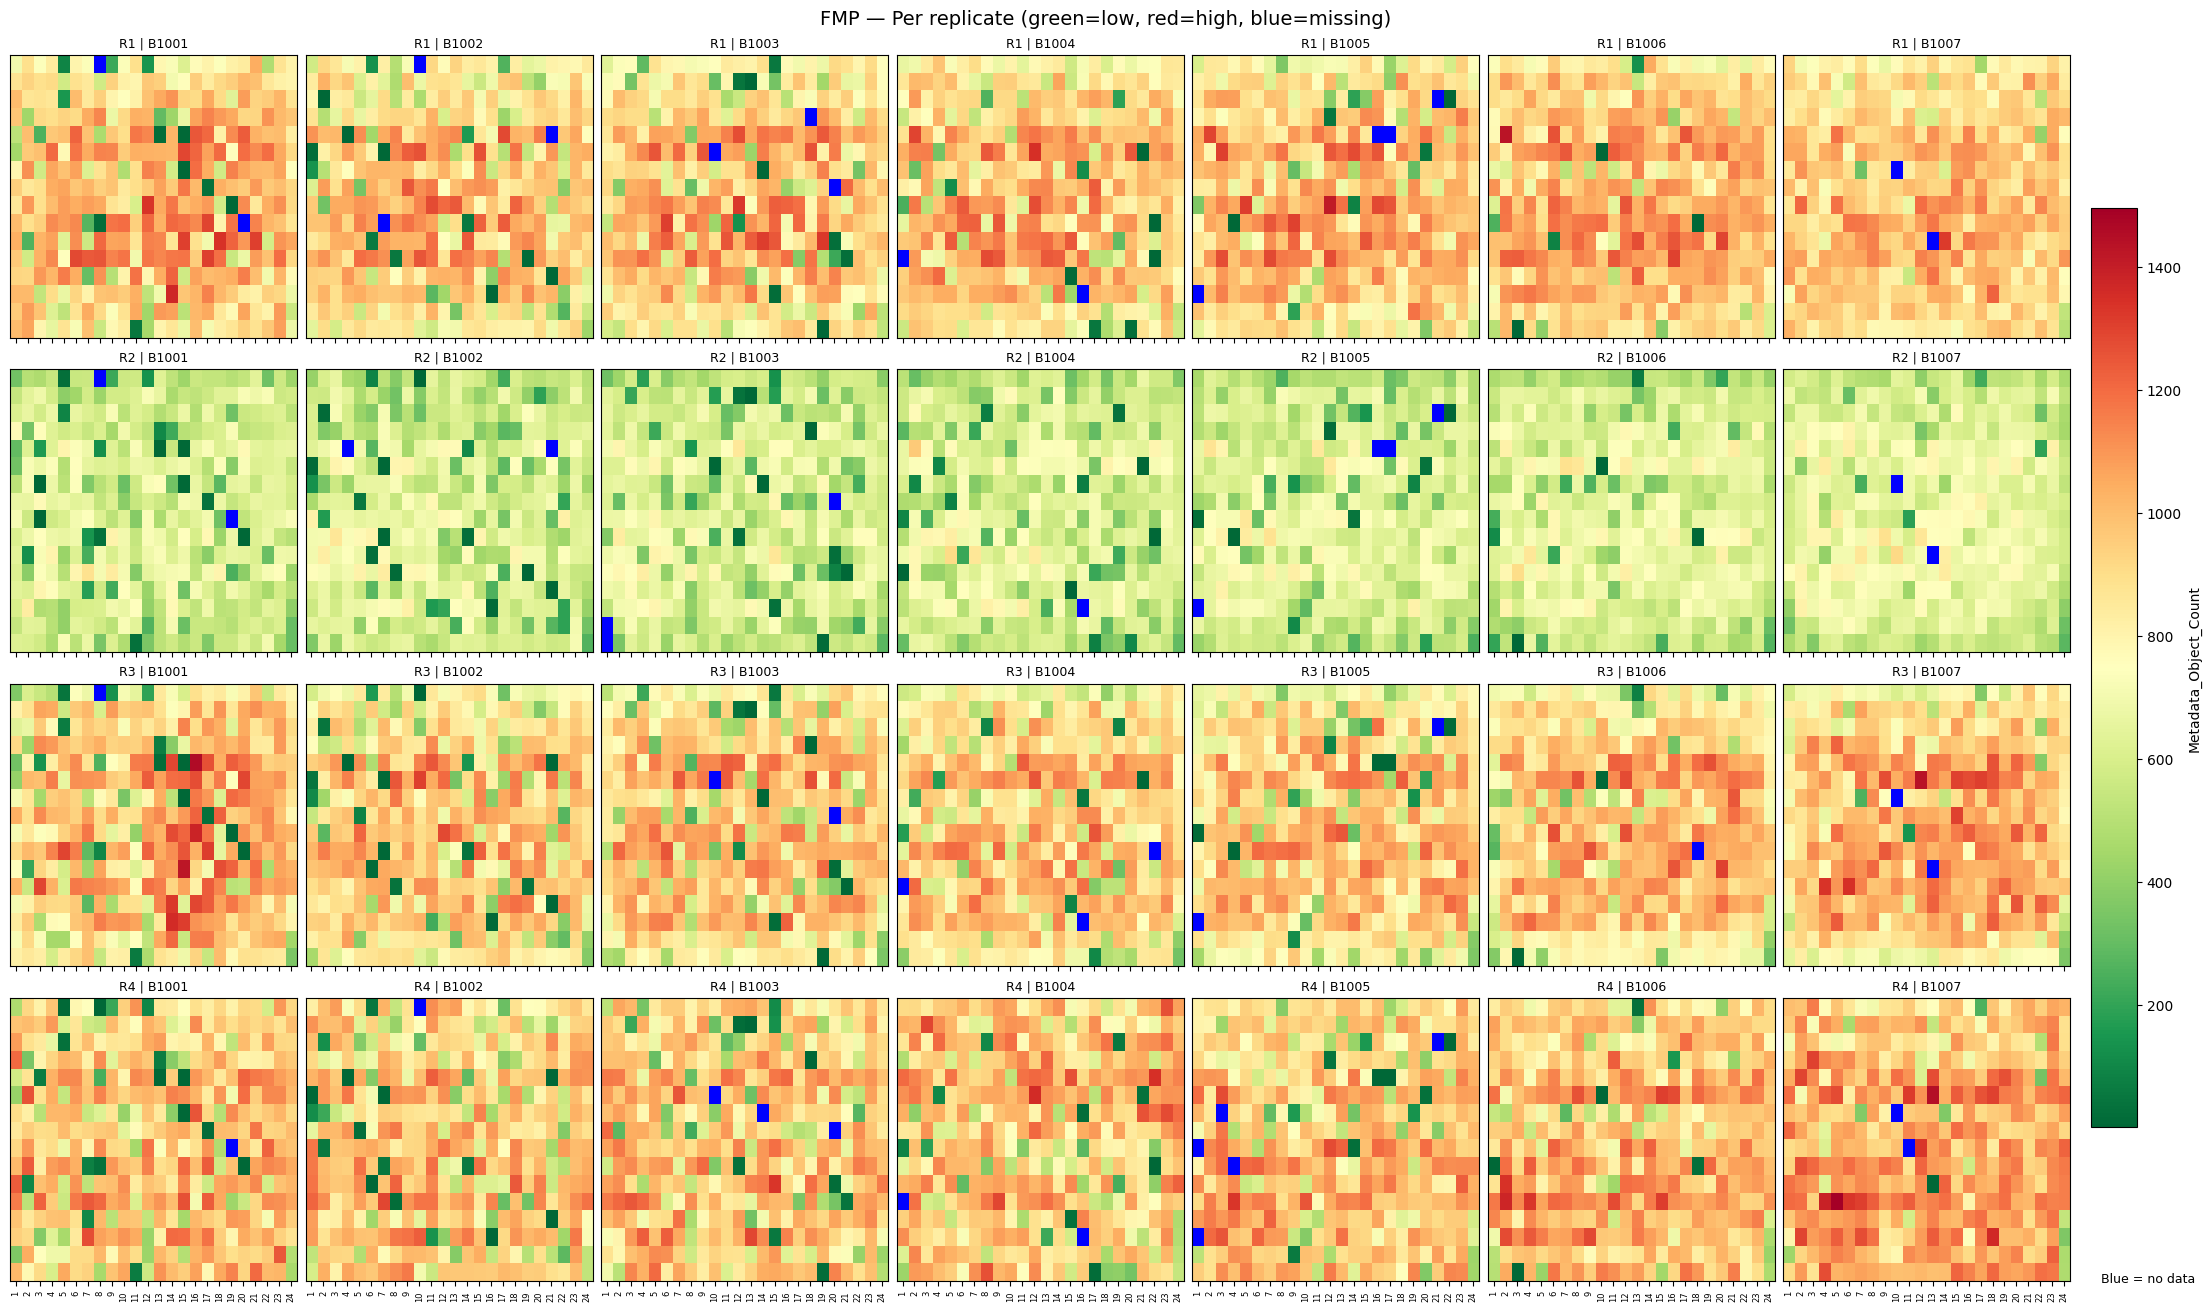

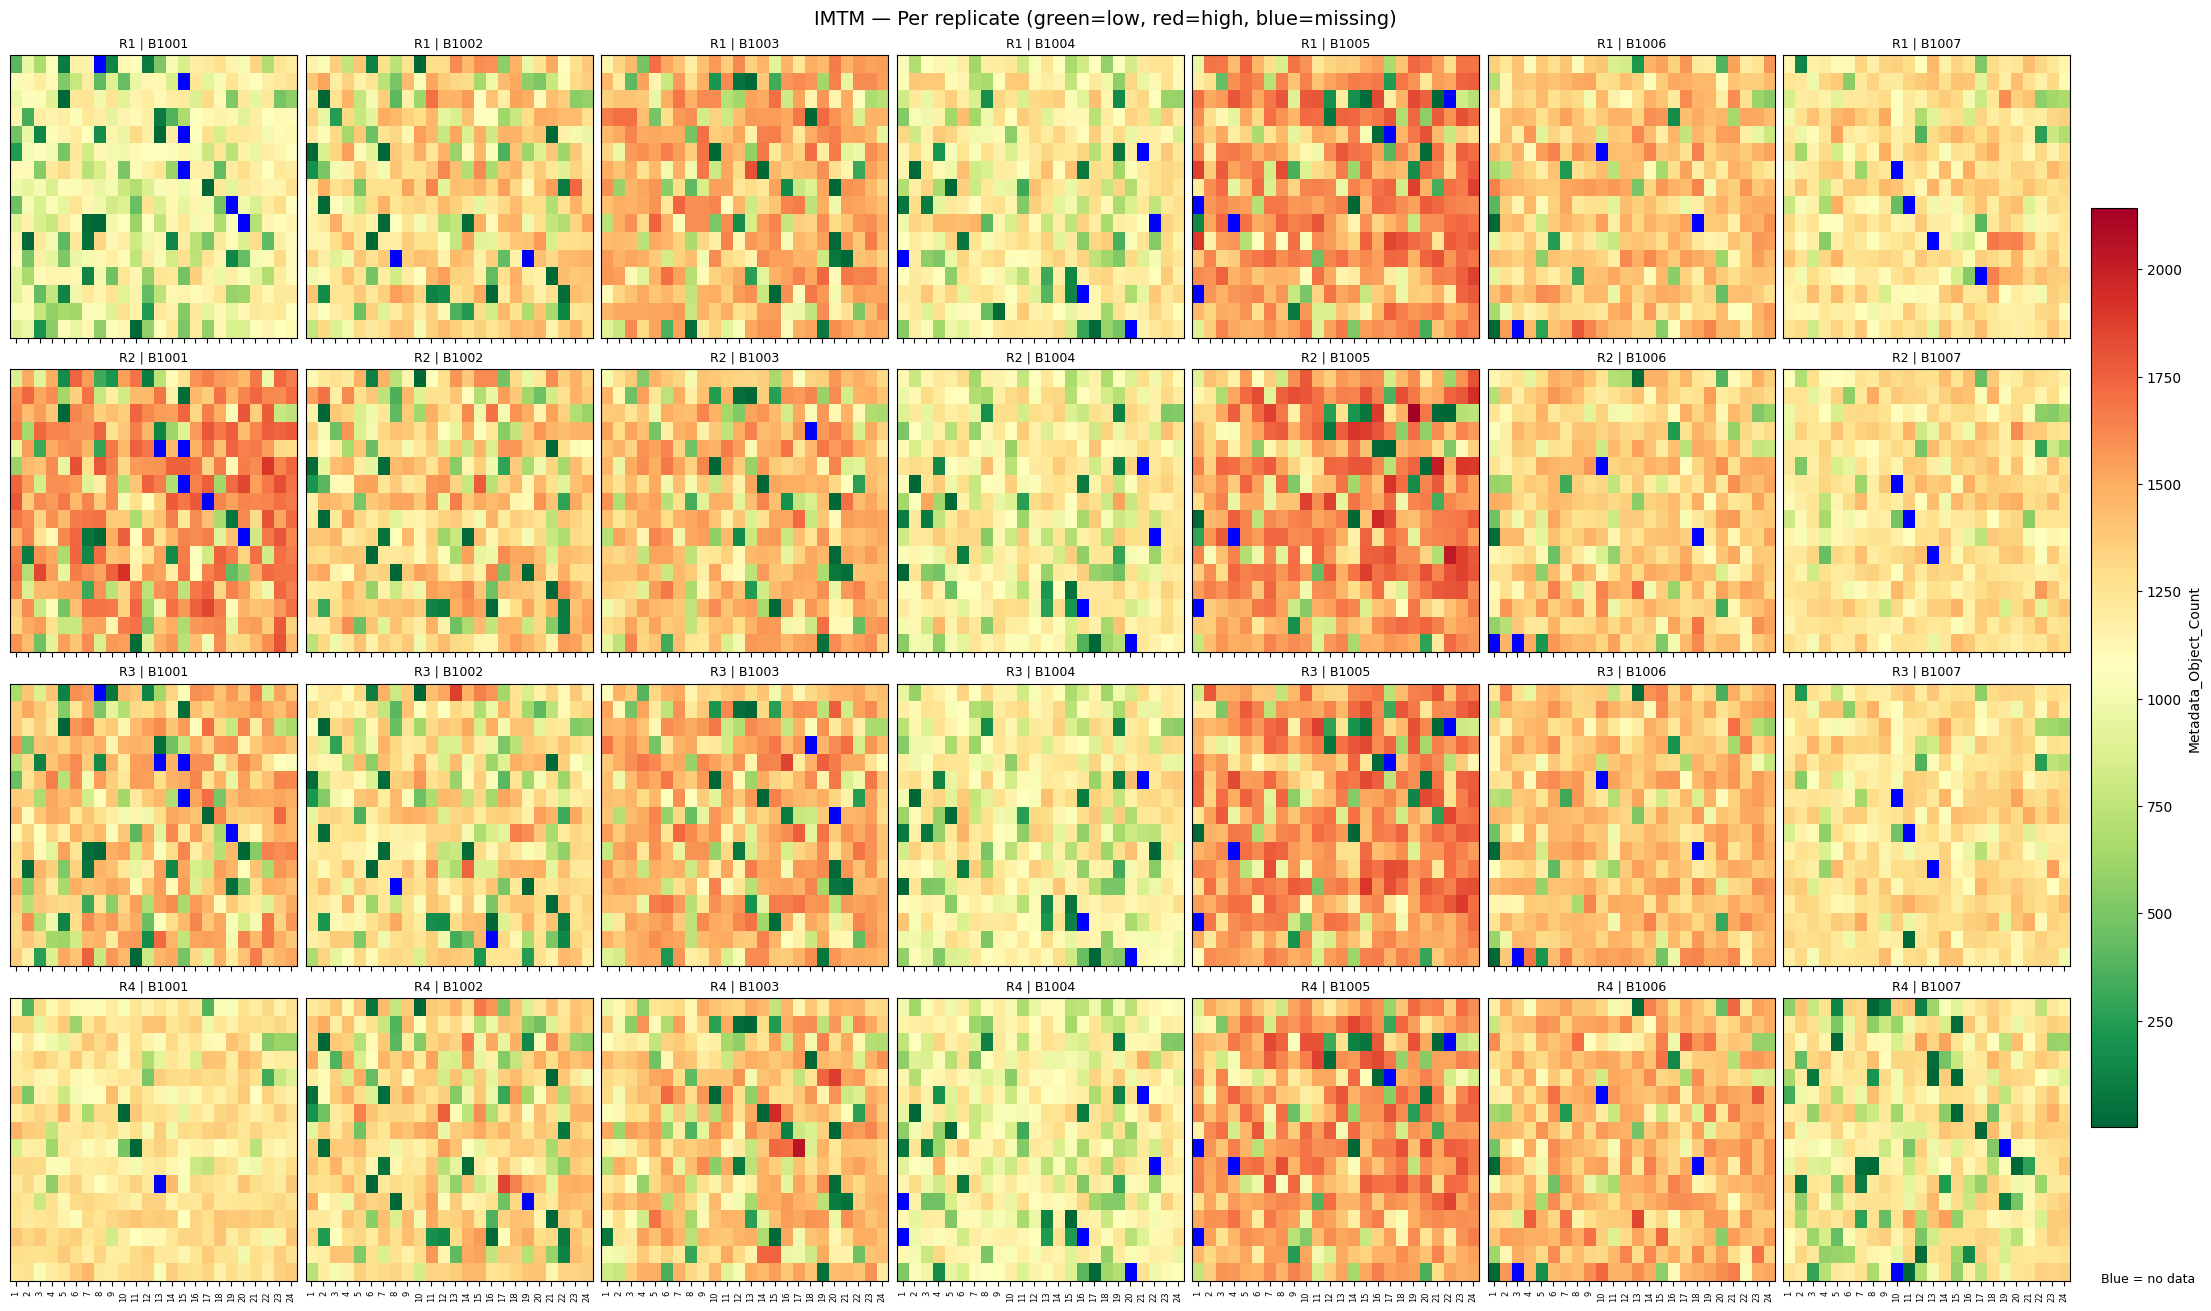

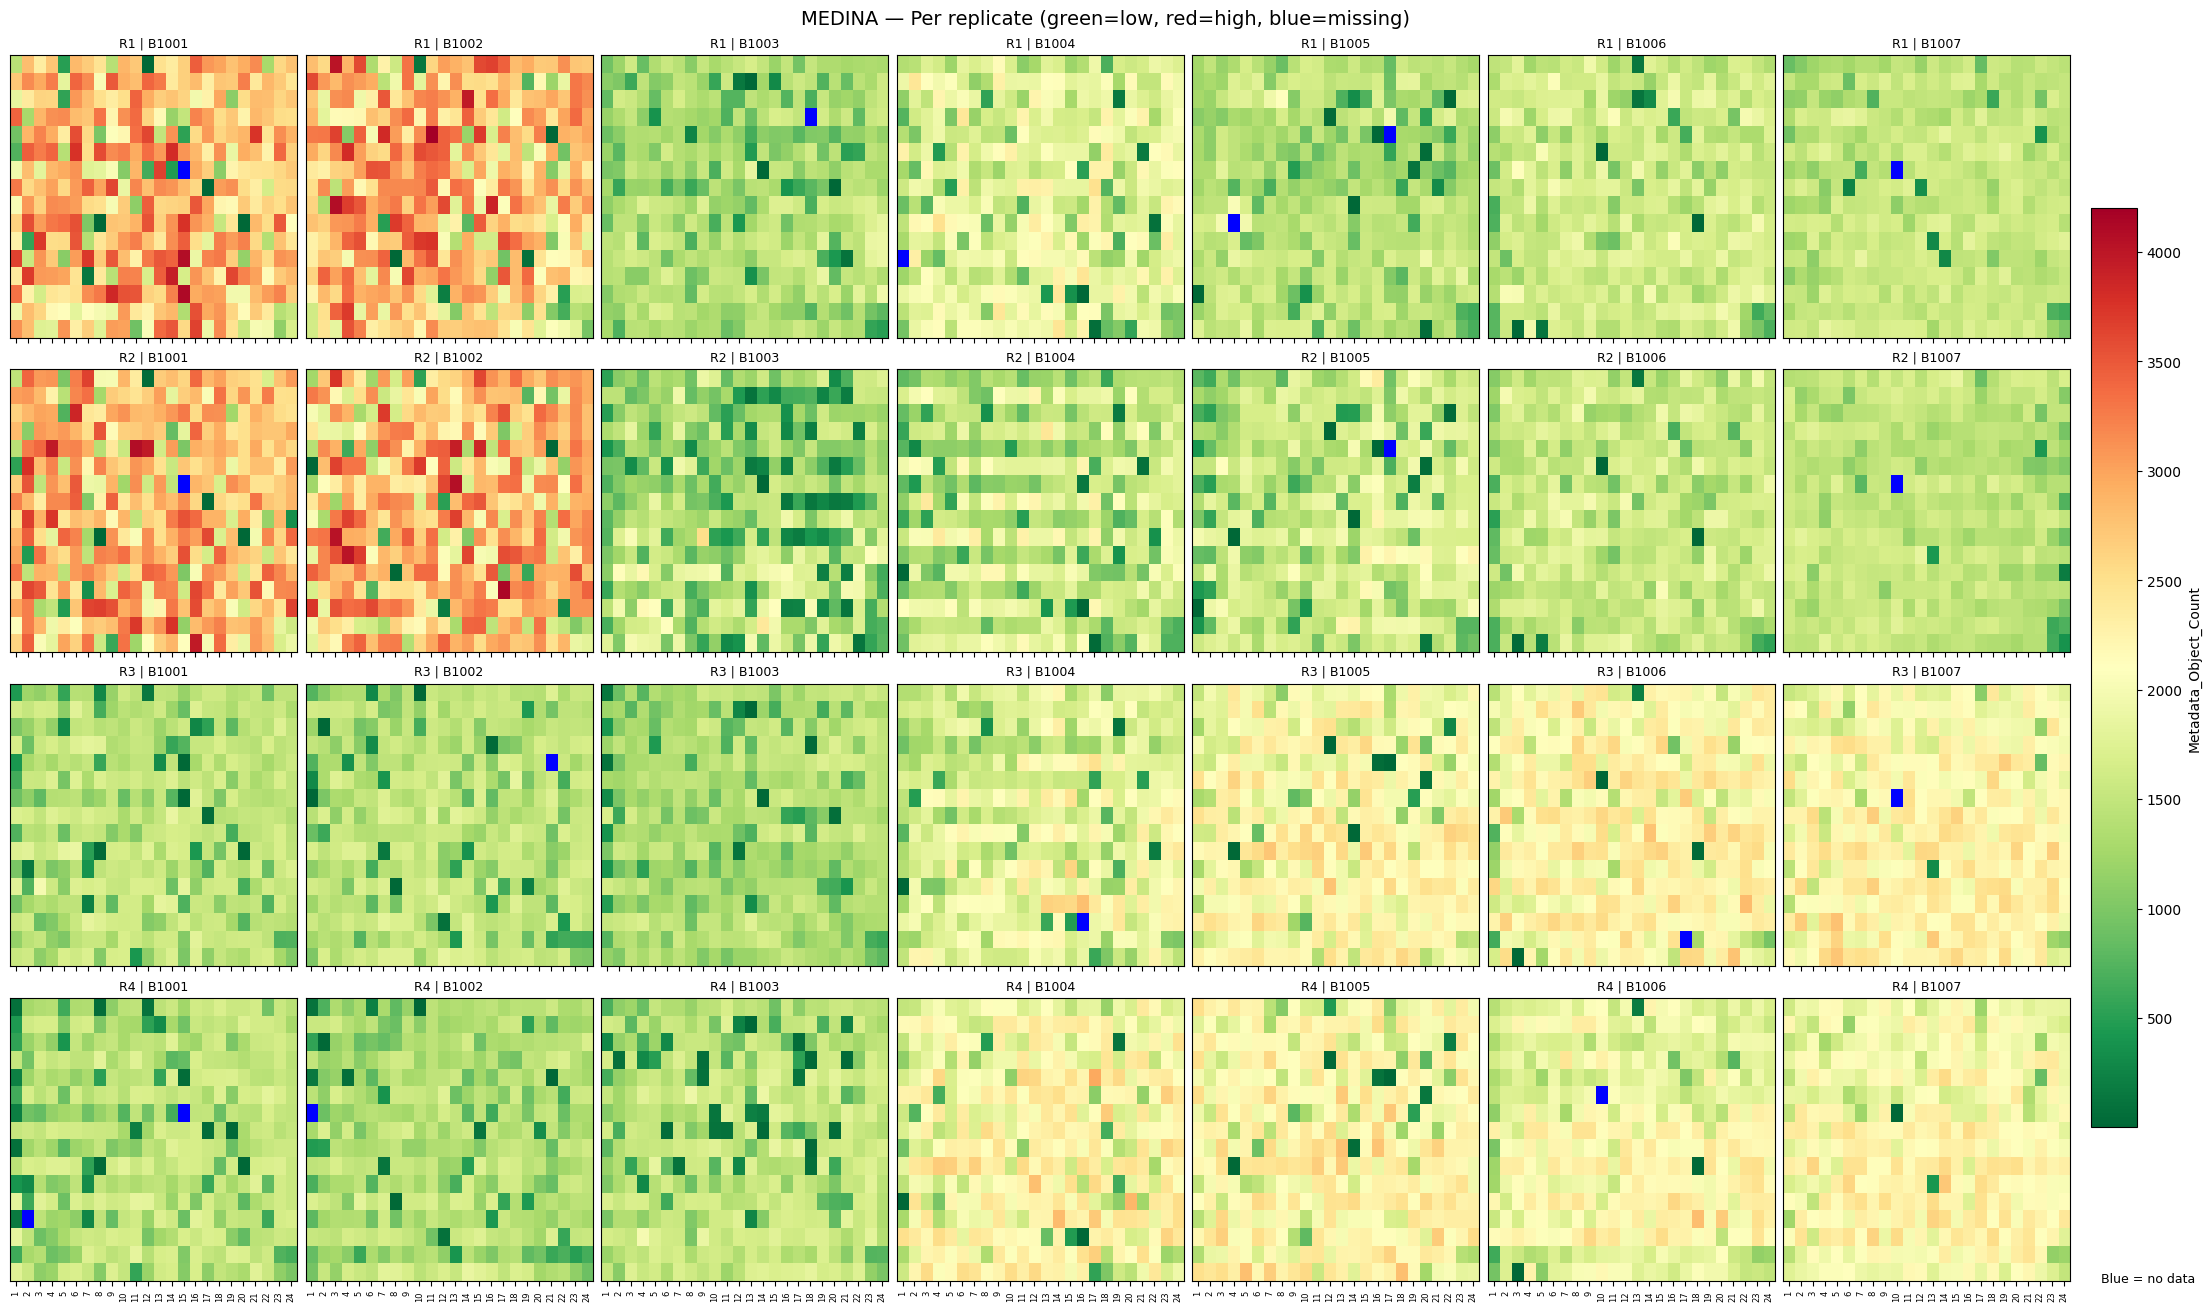

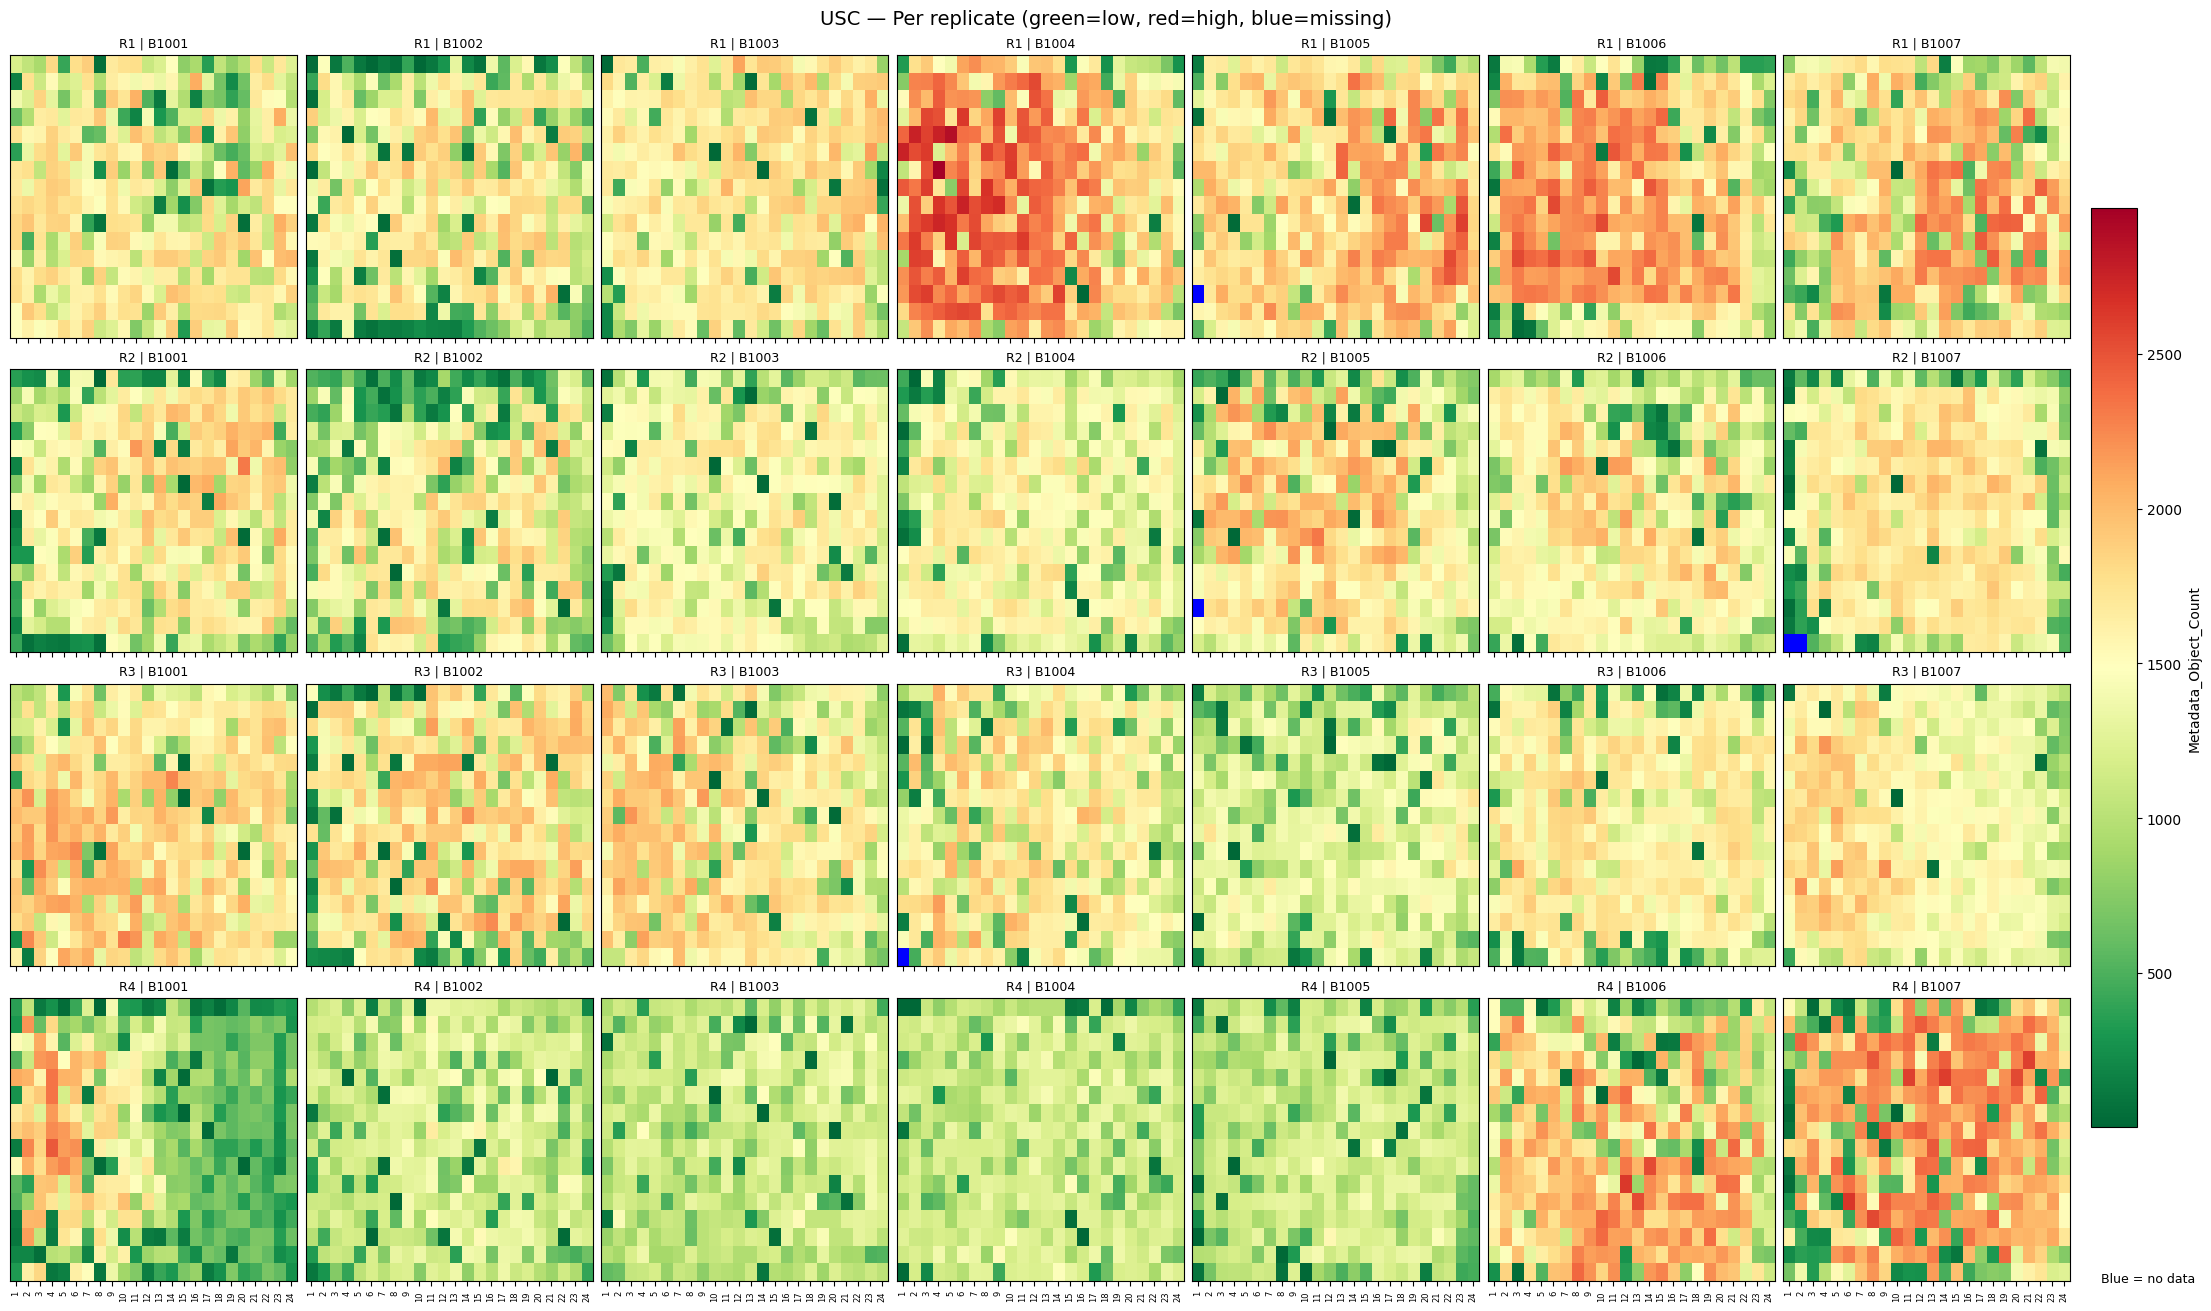

In [7]:
# How to use: 
# mode indicates level of granularity: "per_replicate" - 4x4x7, "collapsed" - 4x7, "combined_sites" - 1x7.
# color_scale indicates how the heatmaps are colored. "global" compares to min/max cell count of entire dataset.
# In per-replicate mode "site" compares to min/max cell count of the site.
# In collapsed mode "site" compares to min/max cell count of the site.
# In combined_sites mode "site" compares to min/max cell count of the average cell count for each (plaet, letter, number) tuple across sites and replicates.


plot_well_heatmaps(df_small, mode="per_replicate", color_scale="site")